In [1]:
import numpy as np #Analysis
import pandas as pd #Analysis
import seaborn as sns #Visualization
import matplotlib
import matplotlib.pyplot as plt #Visualization
from scipy import stats
from scipy.stats import norm, skew

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [3]:
data = [train,test]
train_cols = train.columns.values
test_cols = test.columns.values

In [4]:
train.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [5]:
test.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


In [6]:
cat_cols = test.describe(include=['O']).columns.values
num_cols = test.describe(exclude=['O']).columns.values

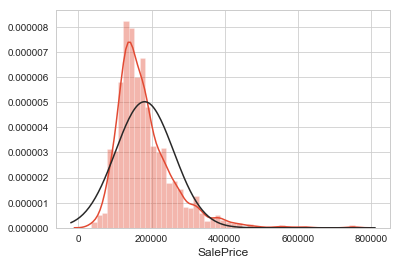

In [7]:
sns.distplot(train['SalePrice'],fit=norm)

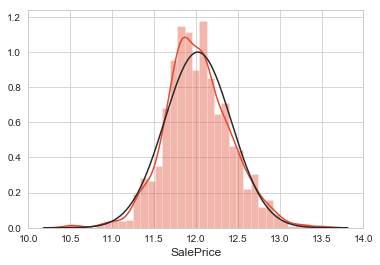

In [8]:
sns.distplot(np.log1p(train['SalePrice']),fit=norm)

In [9]:
train['LogSalePrice'] = np.log1p(train['SalePrice'])
train.drop('SalePrice',axis=1,inplace=True)

***CATEGORICAL DATA COMPLETION***

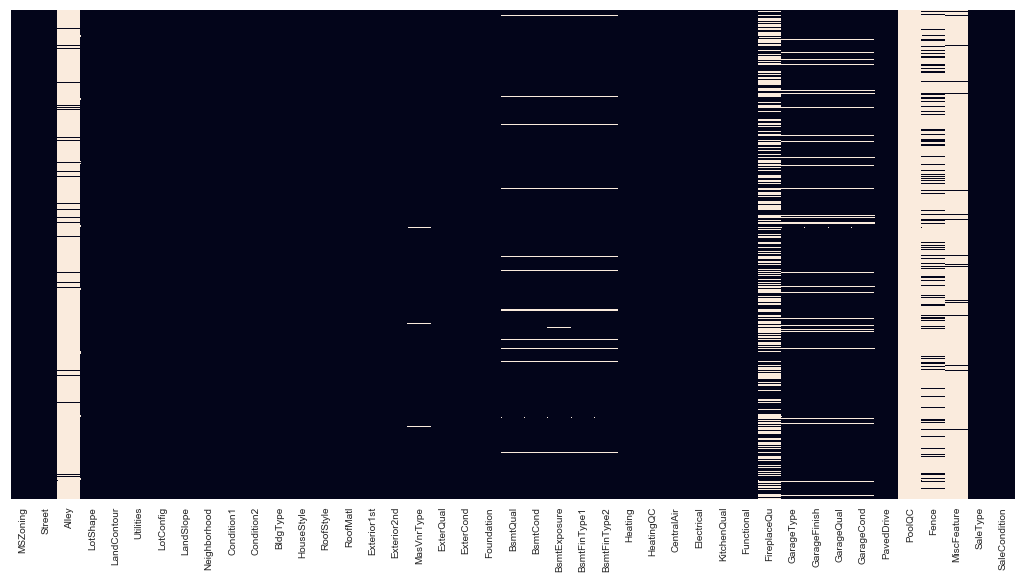

In [10]:
plt.figure(figsize=(18,9))
sns.heatmap(train[cat_cols].isnull(),cbar=False,yticklabels=False)

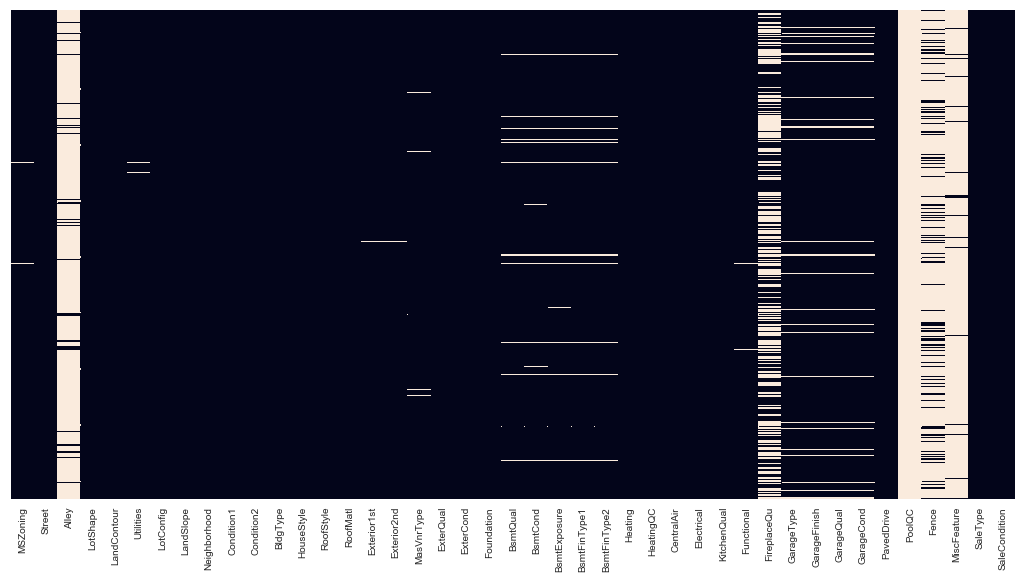

In [11]:
plt.figure(figsize=(18,9))
sns.heatmap(test[cat_cols].isnull(),cbar=False,yticklabels=False)

In [12]:
null_cols = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MasVnrType','Utilities',
             'GarageType','GarageFinish','GarageQual','GarageCond',
             'BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
mode_cols = ['MSZoning','Exterior1st','Exterior2nd']
for data in data:
    for col in null_cols:
        data[col] = data[col].fillna('None')
    for col in mode_cols:
        data[col] = data[col].fillna(data[col].mode()[0])
    data['Functional'] = data['Functional'].fillna('Typ')

***NUMERICAL DATA COMPLETION***

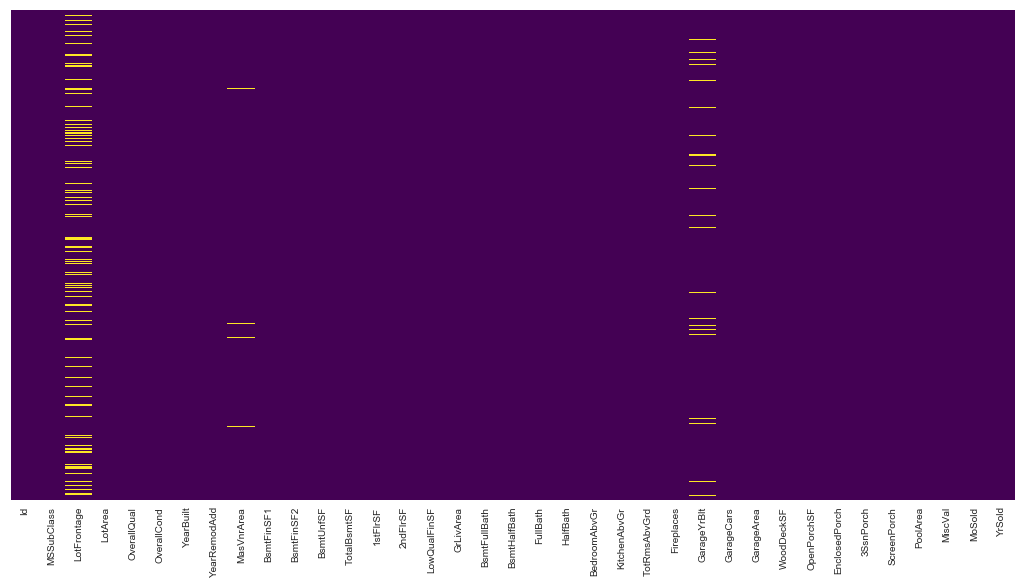

In [13]:
data = [train,test]
plt.figure(figsize=(18,9))
sns.heatmap(train[num_cols].isnull(),cbar=False,yticklabels=False,cmap='viridis')

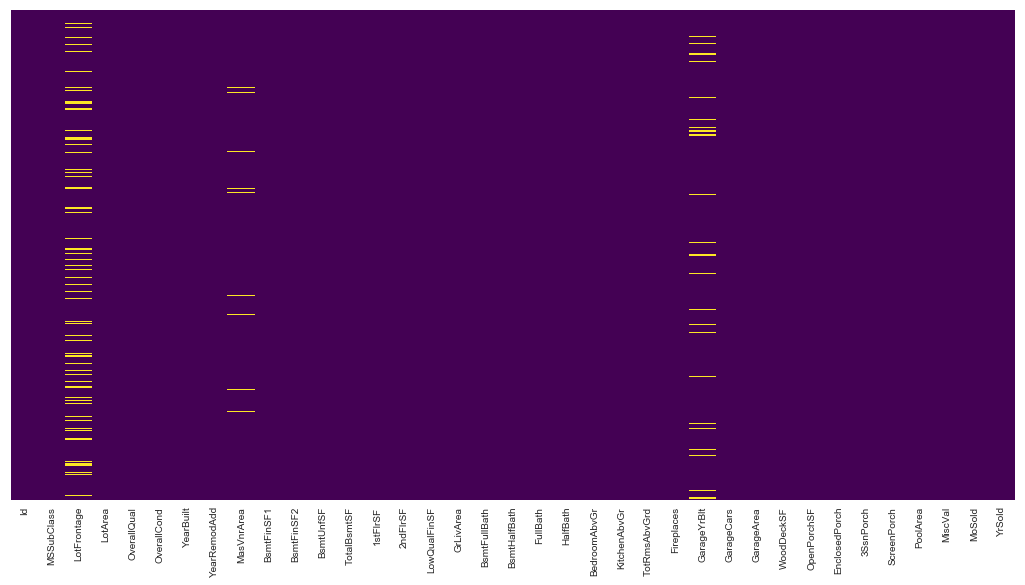

In [14]:
plt.figure(figsize=(18,9))
sns.heatmap(test[num_cols].isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [15]:
for data in data:
    data['LotFrontage'].fillna(data['LotFrontage'].mode()[0],inplace=True)
    data['MasVnrArea'].fillna(0,inplace=True)
    data['GarageYrBlt'].fillna(0,inplace=True)
    data['BsmtFinSF2'].fillna(0,inplace=True)
    data['BsmtFinSF1'].fillna(0,inplace=True)
    data['BsmtUnfSF'].fillna(0,inplace=True)
    data['TotalBsmtSF'].fillna(0,inplace=True)
    data['BsmtFullBath'].fillna(0,inplace=True)
    data['BsmtHalfBath'].fillna(0,inplace=True)
    data['GarageCars'].fillna(data['LotFrontage'].mode()[0],inplace=True)
    data['GarageArea'].fillna(data['LotFrontage'].mode()[0],inplace=True)
    data['SaleType'].fillna('Typ',inplace=True)
    data['KitchenQual'].fillna(data['KitchenQual'].mode()[0],inplace=True)  

***Analysis By correlating***

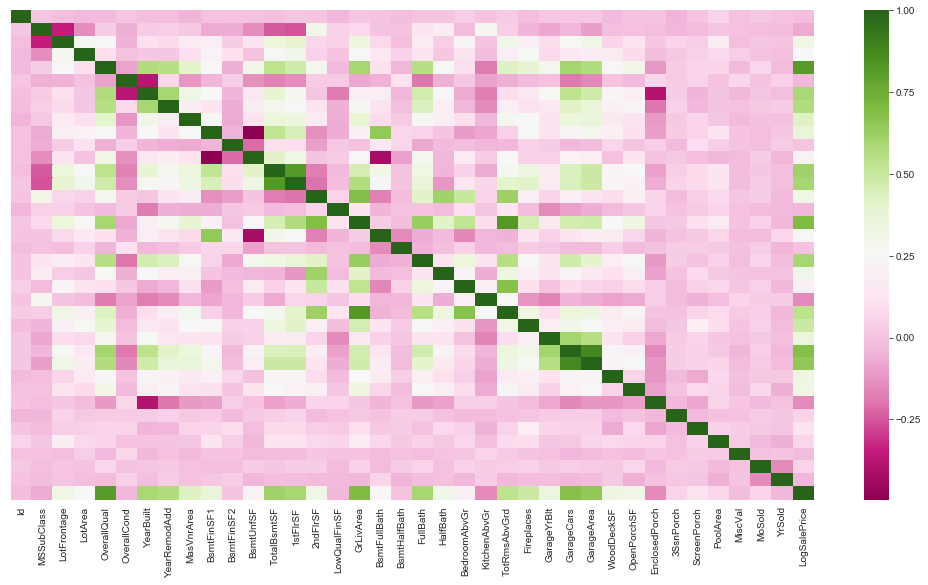

In [16]:
plt.figure(figsize=(18,9))
sns.heatmap(train.corr(),cbar=True,yticklabels=False,cmap='PiYG')

In [17]:
df = pd.DataFrame(train.corr()['LogSalePrice'].sort_values())

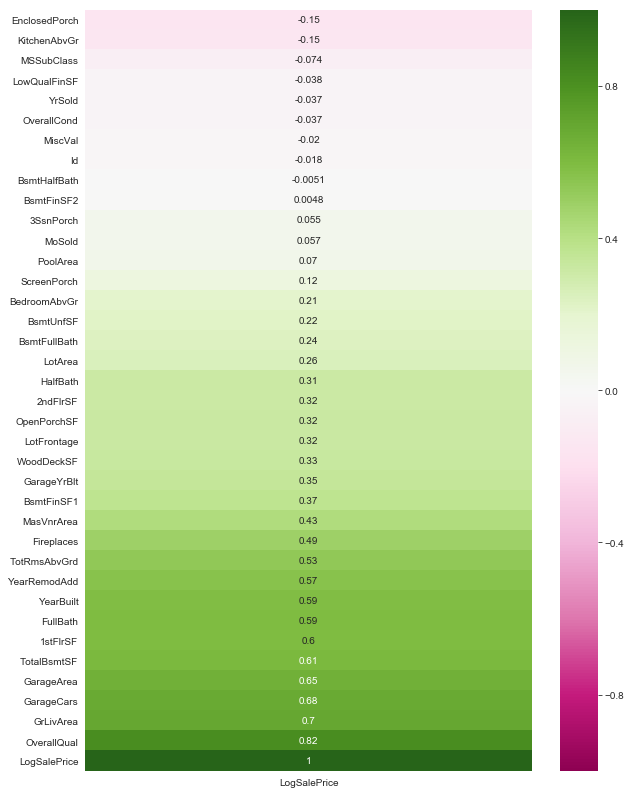

In [18]:
plt.figure(figsize=(10,14))
sns.heatmap(df,cbar=True,annot=True,vmax=1,vmin=-1,cmap='PiYG')

In [19]:
cols = list(df[df['LogSalePrice']>0.5].drop(['YearRemodAdd']).index.values)
cols

['TotRmsAbvGrd',
 'YearBuilt',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual',
 'LogSalePrice']

In [20]:
train[['GarageArea', 'GarageCars']].groupby('GarageCars').describe()

GarageArea                                                      \
                count        mean         std    min    25%    50%    75%   
GarageCars                                                                  
0                81.0    0.000000    0.000000    0.0    0.0    0.0    0.0   
1               369.0  300.517615   87.804287  160.0  250.0  288.0  325.0   
2               824.0  519.797330   98.814314  320.0  450.0  506.0  576.0   
3               181.0  811.574586  126.800855  478.0  732.0  818.0  870.0   
4                 5.0  890.400000  317.510315  480.0  784.0  864.0  968.0   

                    
               max  
GarageCars          
0              0.0  
1            924.0  
2           1418.0  
3           1390.0  
4           1356.0

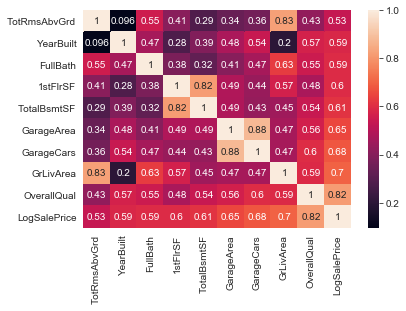

In [21]:
sns.heatmap(train[cols].corr(),cbar=True,annot=True)

**1.**'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are Strongly Correalated hence the are Selected

**2.**GarageCars and GarageArea are Identical so One of them are choosen (GarageCars)

**3.**1stFlrSF and TotalBsmtSf are same

**4.**TotalRmsAbvGrd and GrLiv area are Same

**5.**YearBuilt is Slightly corr with LogSalePrice It may be Choosen by having Time Series Analysis

In [22]:
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath','YearBuilt']
cont_cols = ['GrLivArea','TotalBsmtSF','YearBuilt']

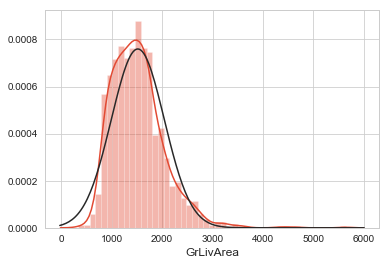

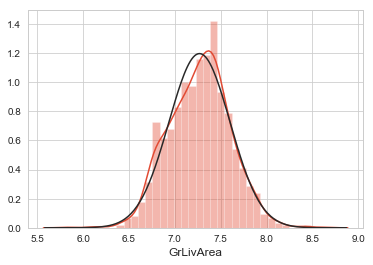

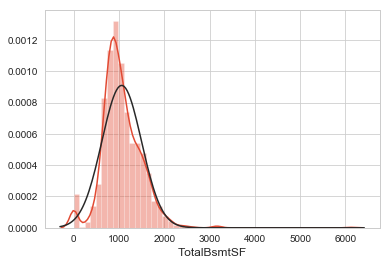

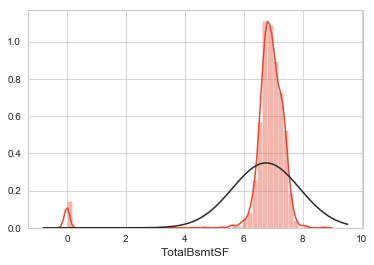

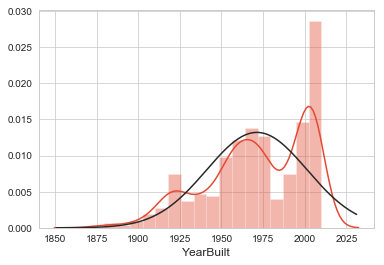

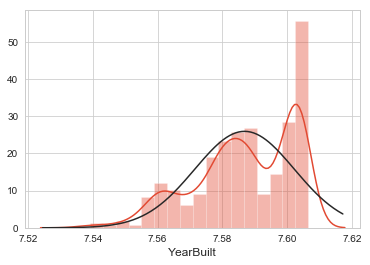

In [23]:
for col in cont_cols:
    sns.distplot(train[col],fit=norm)
    plt.show()
    sns.distplot(np.log1p(train[col]),fit=norm)
    plt.show()

In [24]:
#train['GrLivAreaSimp'] = (train['GrLivArea'] - train['GrLivArea'].mean())/(train['GrLivArea'].max()-train['GrLivArea'].min())
#train['YearBuiltSimp'] = (train['YearBuilt'] - train['YearBuilt'].mean())/(train['YearBuilt'].max()-train['YearBuilt'].min())
#train['TotalBsmtSFSimp'] = (train['TotalBsmtSF'] - train['TotalBsmtSF'].mean())/(train['TotalBsmtSF'].max()-train['TotalBsmtSF'].min())

In [25]:
#test['GrLivAreaSimp'] = (test['GrLivArea'] - test['GrLivArea'].mean())/(test['GrLivArea'].max()-test['GrLivArea'].min())
#test['YearBuiltSimp'] = (test['YearBuilt'] - test['YearBuilt'].mean())/(test['YearBuilt'].max()-test['YearBuilt'].min())
#test['TotalBsmtSFSimp'] = (test['TotalBsmtSF'] - test['TotalBsmtSF'].mean())/(test['TotalBsmtSF'].max()-test['TotalBsmtSF'].min())

In [26]:
for col in cols:
    test[col+'Simp'] = (test[col] - test[col].mean())/(test[col].max()-test[col].min())
    train[col+'Simp'] = (train[col] - train[col].mean())/(train[col].max()-train[col].min())

In [27]:
cols = ['OverallQualSimp', 'GrLivAreaSimp', 'GarageCarsSimp', 'TotalBsmtSFSimp', 'FullBathSimp','YearBuiltSimp']

In [28]:
train[cols].describe()

,OverallQualSimp,GrLivAreaSimp,GarageCarsSimp,TotalBsmtSFSimp,FullBathSimp,YearBuiltSimp
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,1.946692e-17,-1.614006e-17,7.551037e-17,1.927206e-17,3.805936e-17,2.267735e-16
std,1.536663e-01,9.899781e-02,1.868288e-01,7.180120e-02,1.836386e-01,2.188616e-01
min,-5.665906e-01,-2.225817e-01,-4.417808e-01,-1.730654e-01,-5.216895e-01,-7.193319e-01
25%,-1.221461e-01,-7.271358e-02,-1.917808e-01,-4.282806e-02,-1.883562e-01,-1.251290e-01
50%,-1.103501e-02,-9.695497e-03,5.821918e-02,-1.079042e-02,1.449772e-01,1.255211e-02
75%,1.000761e-01,4.922500e-02,5.821918e-02,3.941416e-02,1.449772e-01,2.082043e-01
max,4.334094e-01,7.774183e-01,5.582192e-01,8.269346e-01,4.783105e-01,2.806681e-01


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
X = train[cols]
y = train['LogSalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
mymod = GradientBoostingRegressor(n_estimators=55)
mymod.fit(X_train,y_train)
pred = mymod.predict(X_test)
np.sqrt(mean_squared_error(y_test,pred))

C:\Users\Ravi.RAVI-DRAGOON\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.1691945869091008

In [32]:
from sklearn.ensemble import AdaBoostRegressor
mymod = AdaBoostRegressor(n_estimators=55)
mymod.fit(X_train,y_train)
pred = mymod.predict(X_test)
np.sqrt(mean_squared_error(y_test,pred))

0.21165700568927837

In [33]:
from sklearn.ensemble import BaggingRegressor
mymod = BaggingRegressor(n_estimators=55)
mymod.fit(X_train,y_train)
pred = mymod.predict(X_test)
np.sqrt(mean_squared_error(y_test,pred))

0.17691507738877707

In [34]:
from sklearn.ensemble import RandomForestRegressor
mymod = RandomForestRegressor(n_estimators=55)
mymod.fit(X_train,y_train)
pred = mymod.predict(X_test)
np.sqrt(mean_squared_error(y_test,pred))

0.17567301212412467

In [35]:
X_train = train[cols]
y_train = train['LogSalePrice']
X_test = test[cols]
mymod = GradientBoostingRegressor(n_estimators=55)
mymod.fit(X_train,y_train)
pred = mymod.predict(X_test)
pred = np.exp(pred)
submission = pd.DataFrame({
      "Id": test['Id'],
       "SalePrice": pred
    })
submission.to_csv('SubmissionFile/Submitionxgb.csv',index=False)